# Anomaly Detection 
    For this project, anomaly points are detected using:
        1. IQR
        2. Isolation Forest 
        3. KNN

In [1]:
# Load libraies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN

# Load Data Frames

In [2]:
#load Raw Data
df = pd.read_csv("../data/machine_temperature_system_failure.csv",encoding ='latin' ,low_memory =False)

In [3]:
df.head(5)

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


# Visualize dataset

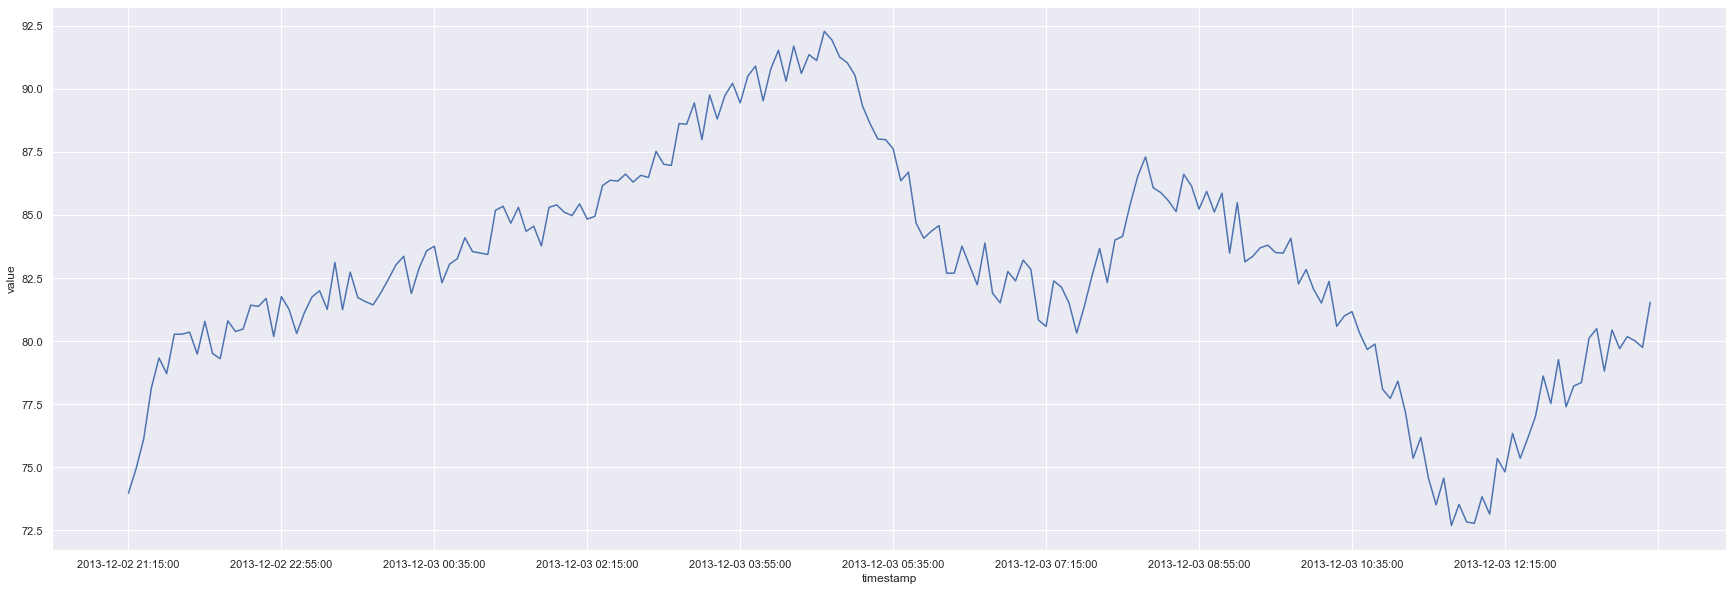

In [4]:
import matplotlib.ticker as ticker
plt.figure(figsize=(30, 10))
sns.set(style="darkgrid")
sns.lineplot(x="timestamp", y="value",
             data=df.head(200))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

# Anomaly Detection

# IQR

In [5]:
q1 = df.value.quantile(0.25)
q3 = df.value.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print('The lower bound of the IQR is {}'.format(lower_bound))
print('The upper bound of the IQR is {}'.format(upper_bound))

The lower bound of the IQR is 66.67581704999999
The upper bound of the IQR is 110.42051237


In [6]:
df_outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print('The number of outliers is {}'.format(len(df_outliers.index)))
df_outliers.head(10)

The number of outliers is 2298


,timestamp,value
320,2013-12-03 23:55:00,65.906496
321,2013-12-04 00:00:00,66.204651
322,2013-12-04 00:05:00,66.094398
323,2013-12-04 00:10:00,64.925151
324,2013-12-04 00:15:00,65.910542
325,2013-12-04 00:20:00,65.076457
326,2013-12-04 00:25:00,64.436539
327,2013-12-04 00:30:00,64.225463
328,2013-12-04 00:35:00,64.673013
329,2013-12-04 00:40:00,62.873392


In [7]:
IQR = np.zeros(df.index.size).astype(int)
IQR[df_outliers.index] = int(-1)
df['IQR'] = IQR

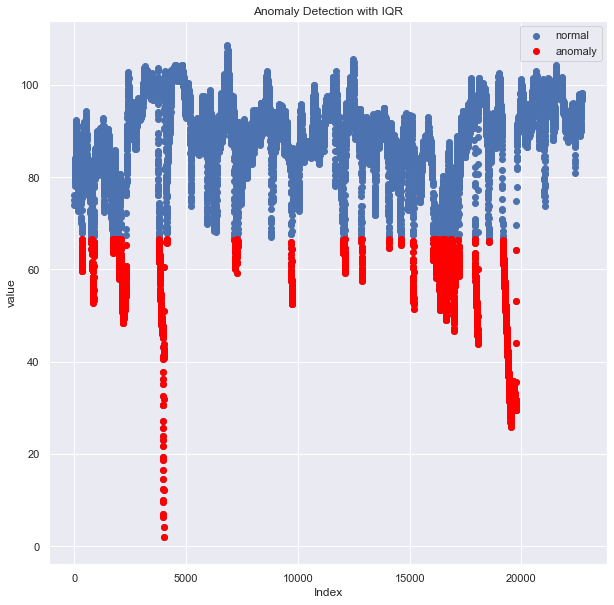

In [8]:
fig, ax = plt.subplots(figsize=[10, 10])
a = df.loc[df['IQR'] == -1,  ['value']]
ax.scatter(df.index, df['value'], label='normal')
ax.scatter(a.index, a['value'], color='red', label='anomaly')
plt.xlabel('Index')
plt.ylabel('value')
plt.title('Anomaly Detection with IQR')
plt.legend()
plt.show()

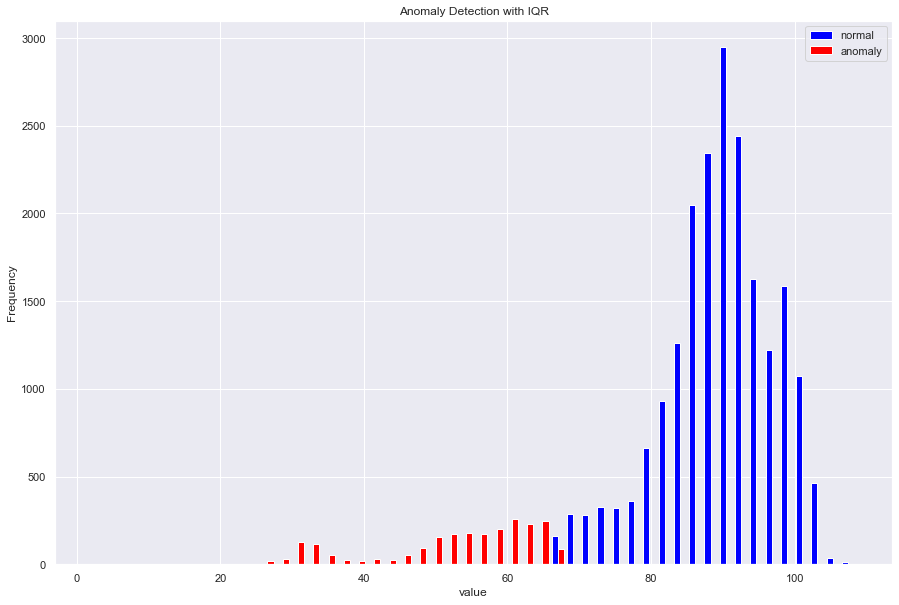

In [9]:
normal = df.loc[df['IQR'] == 0, 'value']
anomaly = df.loc[df['IQR'] == -1, 'value']
fig, axs = plt.subplots(figsize=(15,10))
axs.hist([normal, anomaly], 
         bins=50, 
         stacked=False, 
         color=['blue', 'red'], 
         label=['normal', 'anomaly'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('Anomaly Detection with IQR')
plt.legend()
plt.show()

# Isolation Forest

In [10]:
X = np.array(df['value']).reshape(-1,1)
isolation_forest = IsolationForest(max_samples=100, behaviour="new", contamination = 0.1).fit(X)
outliers_prediction = isolation_forest.predict(X)
outliers_prediction[outliers_prediction == 1] = 0
df['IsolationForest'] = outliers_prediction
print('The number of outliers is {}'.format(list(outliers_prediction).count(-1)))

The number of outliers is 2264


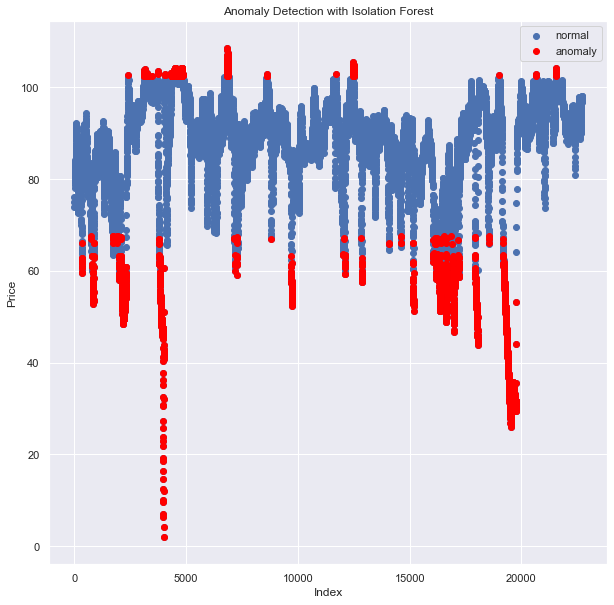

In [11]:
fig, ax = plt.subplots(figsize=[10, 10])
a = df.loc[df['IsolationForest'] == -1,  ['value']]
ax.scatter(df.index, df['value'], label='normal')
ax.scatter(a.index, a['value'], color='red', label='anomaly')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Anomaly Detection with Isolation Forest')
plt.legend()
plt.show()

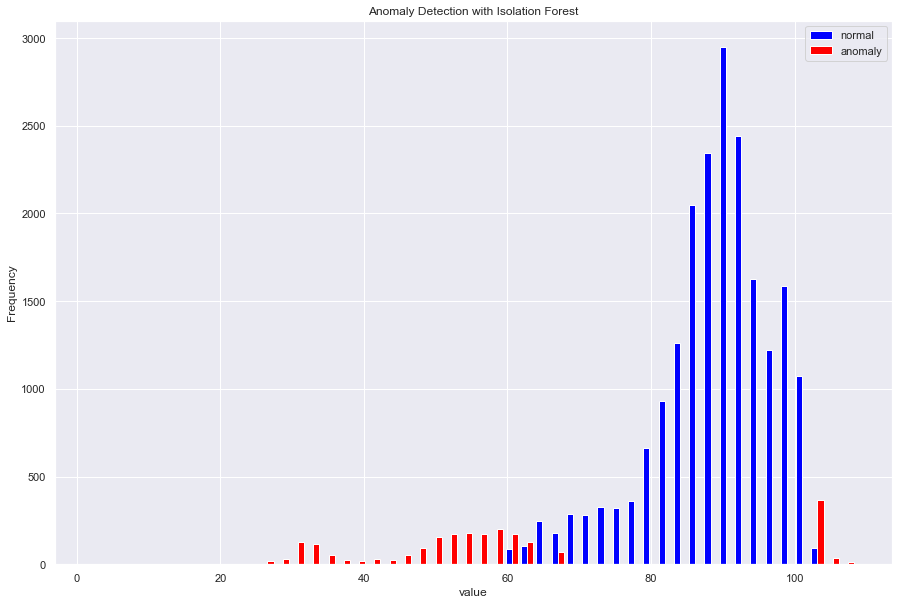

In [12]:
normal = df.loc[df['IsolationForest'] == 0, 'value']
anomaly = df.loc[df['IsolationForest'] == -1, 'value']
fig, axs = plt.subplots(figsize=(15,10))
axs.hist([normal, anomaly], 
         bins=50, 
         stacked=False, 
         color=['blue', 'red'], 
         label=['normal', 'anomaly'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('Anomaly Detection with Isolation Forest')
plt.legend()
plt.show()

# KNN

In [13]:
knn = KNN(contamination=0.025, n_neighbors=1000).fit(X)
outliers_prediction = knn.labels_
outliers_prediction[outliers_prediction == 1] = -1
df['KNN'] = outliers_prediction
print('The number of outliers is {}'.format(list(outliers_prediction).count(-1)))

The number of outliers is 568


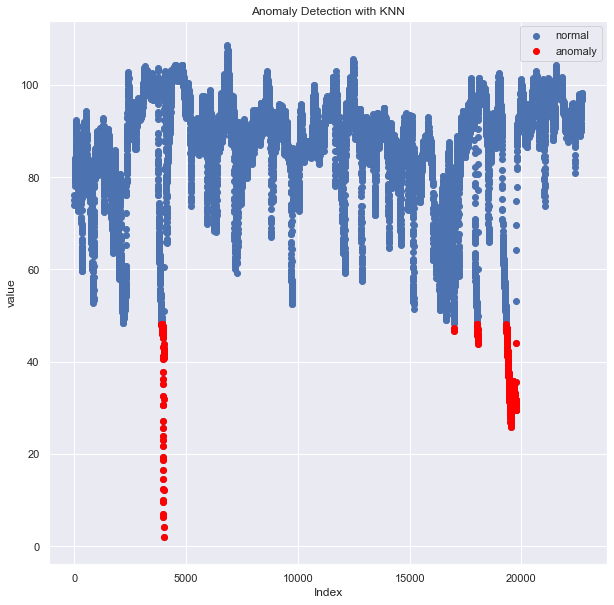

In [15]:
fig, ax = plt.subplots(figsize=[10, 10])

a = df.loc[df['KNN'] == -1,  ['value']]
ax.scatter(df.index, df['value'], label='normal')
ax.scatter(a.index, a['value'], color='red', label='anomaly')
plt.xlabel('Index')
plt.ylabel('value')
plt.title('Anomaly Detection with KNN')
plt.legend()
plt.show()

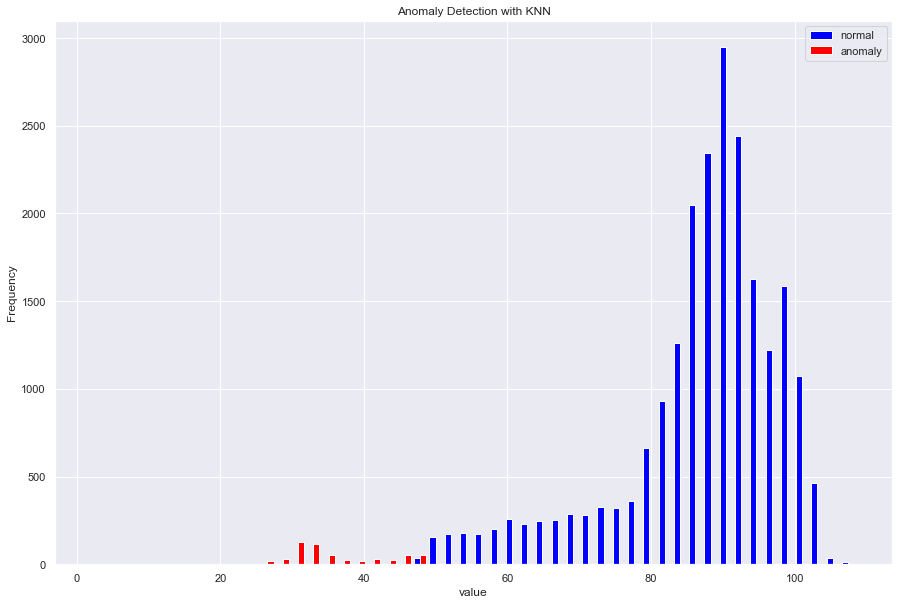

In [16]:
normal = df.loc[df['KNN'] == 0, 'value']
anomaly = df.loc[df['KNN'] == -1, 'value']
fig, axs = plt.subplots(figsize=(15,10))
axs.hist([normal, anomaly], 
         bins=50, 
         stacked=False, 
         color=['blue', 'red'], 
         label=['normal', 'anomaly'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('Anomaly Detection with KNN')
plt.legend()
plt.show()

# Conclusion:
       The annomaly points are detected using various methods with the settings given above. 